<h1>Import necessary libraries</h1>



In [1]:



import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns





2024-06-03 22:27:52.816118: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h1>Load and prepare the CIFAR-10 dataset</h1>

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

<h1> Convert class vectors to binary labels (1 if can fly, 0 if cannot fly)</h1>

In [2]:

fly_classes = [0, 2]  # airplane and bird
y_train_bin = np.isin(y_train, fly_classes).astype(np.int32)
y_test_bin = np.isin(y_test, fly_classes).astype(np.int32)



<h1> Normalize pixel values to be between 0 and 1</h1>

In [3]:

x_train, x_test = x_train / 255.0, x_test / 255.0



 <h1>Define the CNN architecture</h1>

In [4]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: 1 output neuron with sigmoid activation
])



/Users/macbookpro/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h1> Compile the model</h1>

In [5]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



<h1>Train the model</h1>

In [6]:

history = model.fit(x_train, y_train_bin, epochs=10, 
                    validation_data=(x_test, y_test_bin))



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.8171 - loss: 0.4393 - val_accuracy: 0.8552 - val_loss: 0.3546
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8602 - loss: 0.3428 - val_accuracy: 0.8682 - val_loss: 0.3205
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8777 - loss: 0.3060 - val_accuracy: 0.8803 - val_loss: 0.2989
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8882 - loss: 0.2785 - val_accuracy: 0.8809 - val_loss: 0.2902
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8986 - loss: 0.2545 - val_accuracy: 0.8878 - val_loss: 0.2808
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.9030 - loss: 0.2360 - val_accuracy: 0.8804 - val_loss: 0.3065
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9127 - loss: 0.2221 - val_accuracy: 0.8847 - val_loss: 0.2776
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9211 -

<h1> Evaluate the model on the testing set</h1>

In [9]:

y_pred = model.predict(x_test)
y_pred_bin = (y_pred > 0.5).astype(np.int32)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


<h1> Compute evaluation metrics and print classification report </h1>

In [10]:

report = classification_report(y_test_bin, y_pred_bin, target_names=['Cannot Fly', 'Can Fly'])
print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

  Cannot Fly       0.94      0.91      0.92      8000
     Can Fly       0.67      0.76      0.71      2000

    accuracy                           0.88     10000
   macro avg       0.80      0.83      0.82     10000
weighted avg       0.88      0.88      0.88     10000



<h1> Confusion matrix </h1>

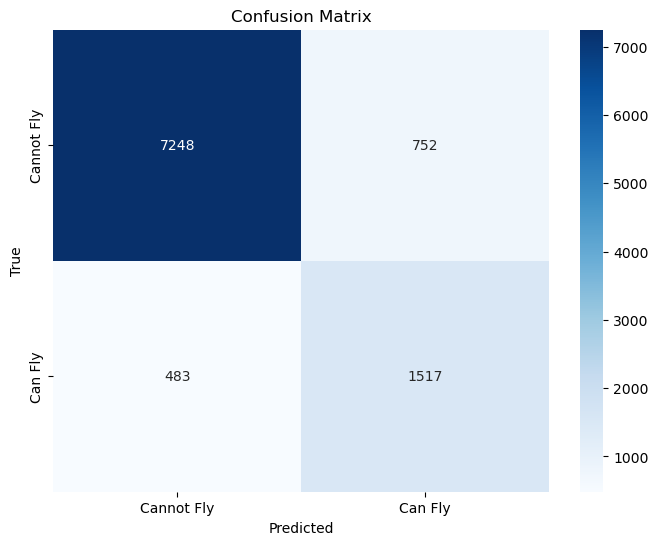

In [11]:

cm = confusion_matrix(y_test_bin, y_pred_bin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
